Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?vusp=share_link

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

Q2. Split the dataset into a training set (70%) and a test set (30%).

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

### & 

### Q2. Split the dataset into a training set (70%) and a test set (30%).


In [1]:
import pandas as pd
data = pd.read_csv('/Users/aakanksha/My_Codes/data-science-master-course/data/heart_disease_dataset.csv')

In [2]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# defining X and y
X = data.drop(columns='target')
y = data['target']

In [4]:
# performing feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to your feature matrix X
scaler.fit(X)

# Transform the feature matrix X
X_scaled = scaler.transform(X)

In [5]:
# splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [6]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, max_depth=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy score: ',accuracy)
print('precision score: ',precision)
print('recall score: ',recall)
print('f1 score: ',f1)

accuracy score:  0.8131868131868132
precision score:  0.8235294117647058
recall score:  0.84
f1 score:  0.8316831683168315


### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.


In [8]:
# Retrieve feature importances from the trained classifier
importances = classifier.feature_importances_

# Get the indices of the top 5 features with highest importances
top5_indices = importances.argsort()[-5:][::-1]

# Get the names of the top 5 features
top5_features = X.columns[top5_indices]

top5_features

## ca', 'oldpeak', 'cp', 'thal', 'thalach' are the top 5 important features

Index(['ca', 'cp', 'thal', 'thalach', 'oldpeak'], dtype='object')

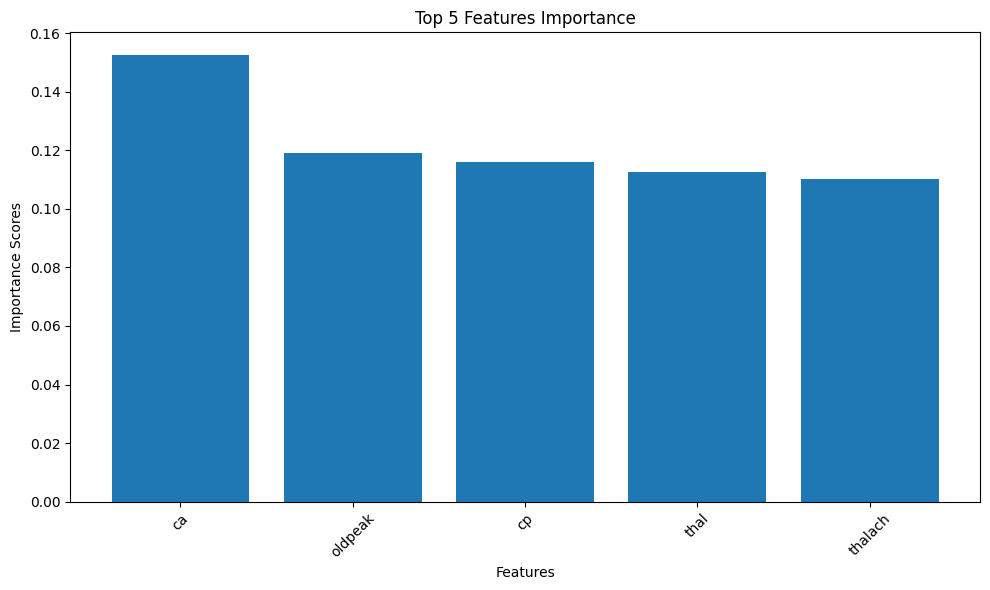

In [9]:
# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(top5_features)), importances[top5_indices], align='center')
plt.xticks(range(len(top5_features)), top5_features, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Top 5 Features Importance')
plt.tight_layout()
plt.show()

### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Define the hyperparameters to search
parameter = {'n_estimators' : [100,200,300],
             'max_depth' : [5,10,15],
             'min_samples_split' : [2,5,10],
             'min_samples_leaf' : [1,2,4]}

# Create the grid search object
grid_search = GridSearchCV(estimator=classifier, param_grid=parameter, cv=5, verbose=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_scaled, y)

print("------------")
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.885 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.803 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.836 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.817 total time=   0.2s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.767 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.800 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.836 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.902 total time=   0.2s
[C

### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [10]:
# create the default random forest classifier
default_classifier = RandomForestClassifier()

# Train the default model
default_classifier.fit(X_train, y_train)

# Evaluate the default model on the test set
y_pred_default = default_classifier.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print("Test accuracy (default model): ", accuracy_default)

Test accuracy (default model):  0.8131868131868132


### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [11]:
best_rfc = grid_search.best_estimator_
top5_features[0:2]



Index(['ca', 'cp'], dtype='object')

In [12]:
#convert X_train into dataframe since it is in array

X_train = pd.DataFrame(X_train,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'] )

X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.694735,-1.468418,1.002577,-2.148802,-0.913400,-0.417635,0.898962,1.283627,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
1,-2.797624,0.681005,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,2.289429,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
2,-0.481558,-1.468418,1.002577,-0.663867,-0.526890,-0.417635,0.898962,0.365287,-0.696631,0.483451,-0.649113,-0.714429,-0.512922
3,-0.040403,0.681005,-0.938515,0.478391,-0.140381,-0.417635,0.898962,0.452748,-0.696631,0.138373,0.976352,-0.714429,-0.512922
4,-1.805024,0.681005,1.002577,0.364165,-1.377212,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,3.203615,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,-0.481558,0.681005,1.002577,0.478391,-0.256334,-0.417635,0.898962,0.583939,-0.696631,-0.379244,-0.649113,0.265082,1.123029
208,-0.371269,0.681005,1.002577,-2.148802,-0.372287,-0.417635,0.898962,0.190365,1.435481,-0.896862,0.976352,0.265082,1.123029
209,1.613930,0.681005,1.973123,1.620649,-0.237008,2.394438,-1.005832,-0.815437,-0.696631,-0.810592,-0.649113,0.265082,-0.512922
210,-0.922713,0.681005,-0.938515,-0.663867,0.052874,-0.417635,-1.005832,-0.246940,-0.696631,-0.206705,0.976352,-0.714429,1.123029


In [13]:
top2 = X_train[['ca','oldpeak']]
top2.head()

,ca,oldpeak
0,-0.714429,-0.896862
1,-0.714429,-0.896862
2,-0.714429,0.483451
3,-0.714429,0.138373
4,3.203615,-0.896862


In [14]:
top2 =pd.concat([top2,y_train], axis=1)
top2 = top2[0:212] ## removing NaN values
top2


,ca,oldpeak,target
0,-0.714429,-0.896862,1.0
1,-0.714429,-0.896862,1.0
2,-0.714429,0.483451,1.0
3,-0.714429,0.138373,1.0
4,3.203615,-0.896862,1.0
...,...,...,...
207,0.265082,-0.379244,0.0
208,0.265082,-0.896862,0.0
209,0.265082,-0.810592,0.0
210,-0.714429,-0.206705,0.0


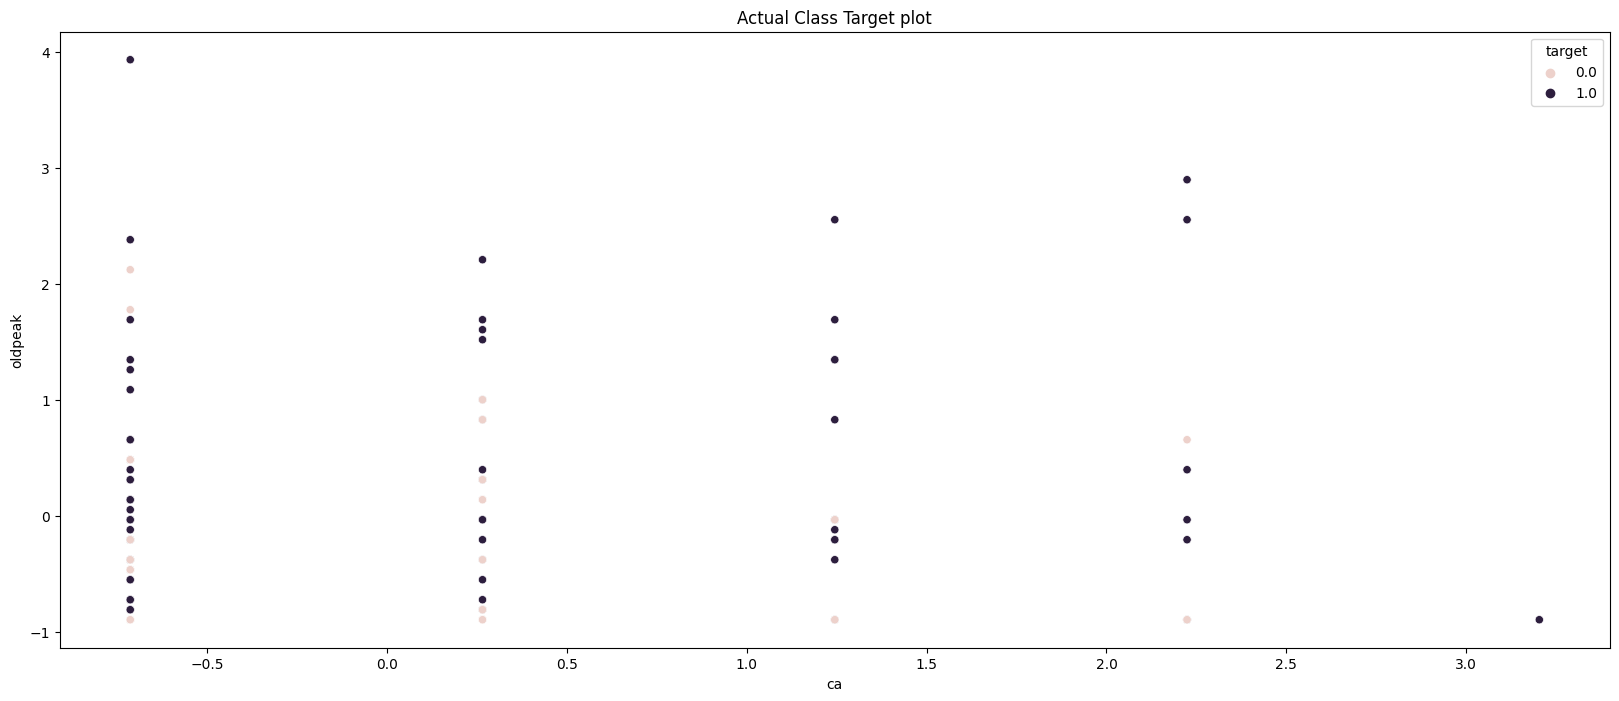

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.scatterplot(data=top2,x='ca',y='oldpeak',hue='target')
plt.title('Actual Class Target plot')
plt.show()

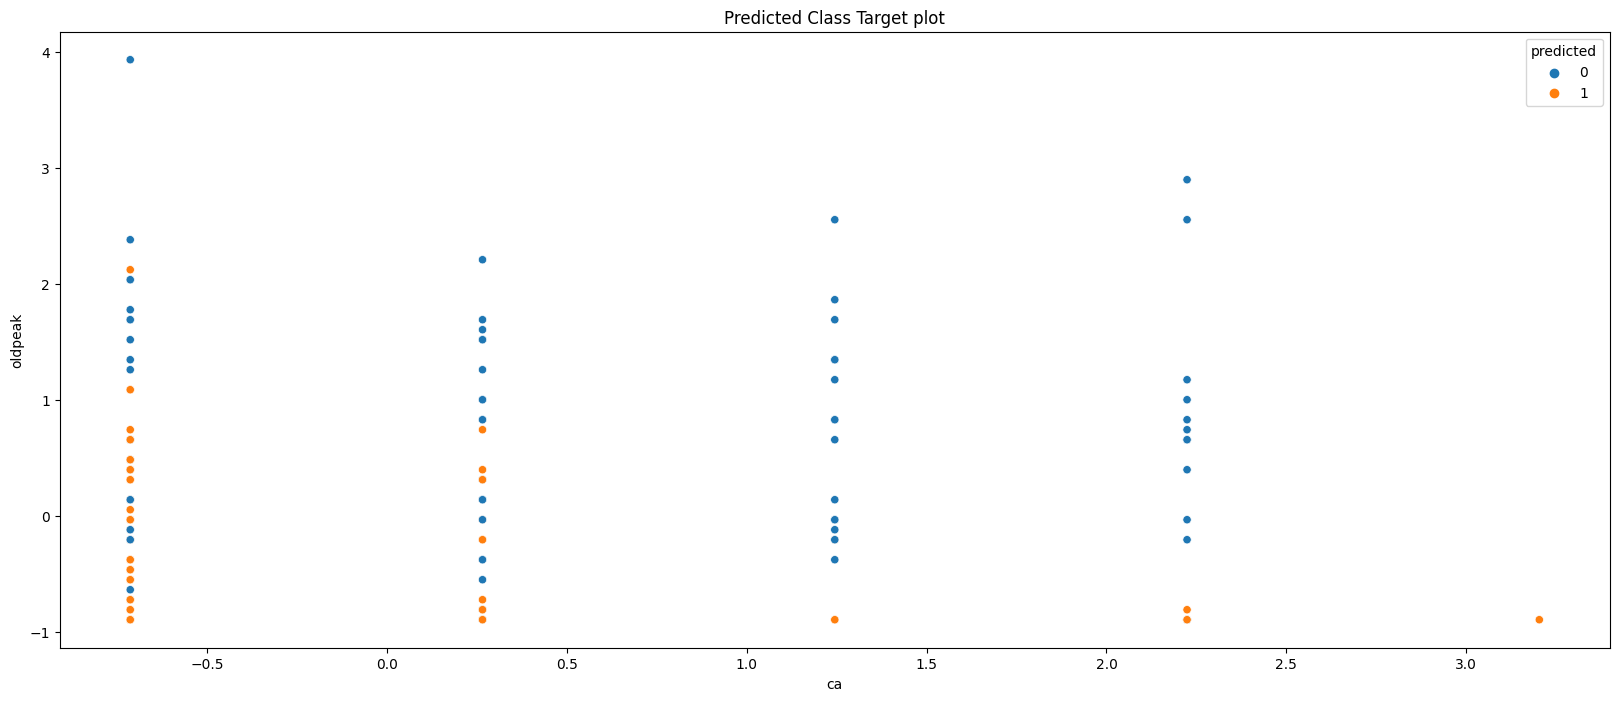

In [16]:
import warnings
warnings.filterwarnings('ignore')


top2['predicted'] = best_rfc.predict(X_train)
plt.figure(figsize=(20,8))
sns.scatterplot(data=top2,x='ca',y='oldpeak',hue='predicted')
plt.title('Predicted Class Target plot')
plt.show()
